## Final Project Submission

Please fill out:
* Student name: Kevin Gross
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Microsoft Studios Data Analysis
--------
Author: Kevin Gross

## General Overview
------
This project analyzes movie studio data from 2010 to 2018 to better understand why movies perform well at the domestic box office. The analysis below shows that domestic box office revenues can be linked to specific genres, movie runtime, and the time of year the movie is released. This information is for the head of Microsoft Studios so they can help decide what type of films to create.



## Business Problem
_______
Microsoft is seeing all the big companies create original video content and have decided that this is a revenue stream that they want to attempt to tap into. Their first thought is to create a new movie studio, but they do not know anything about creating movies. The information below explores what types of films are doing best at the box office and translates those findings into actionable insights that the head of Microsoft Studios can use to help decide what type of films to create. 


## Data Understanding
-------

This analysis looks at a few different datasets. 
* Movie Gross data Box Office Mojo
* Movie Basics and Movie Ratings from IMDB
* Movie Information from The Movie Database

The tables from IMDB were able to be joined using a unique Movie ID column. From there, the newly combined table was joined with the movie gross data and movie information data based on movie title. Each data file provided a different types of information that was used in the below analysis. 

## Import Packages

Import the necessary packages for our data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

## Inspect the CSV File Data

In [2]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [4]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Cleaning and Preparation

Since there are only 5 films out of 3,387 that are missing a studio, we are going to drop those from our dataset. Additionally, we are going to drop the 28 films that are missing a value for domestic gross.

In [5]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross'])

Check to make sure the missing data was dropped

In [7]:
movie_gross.isna().sum() # Studio NaN went from 5 to 0 and Domestic_Gross Nan went from 28 to 0

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

We need to change the foreign_gross column from an object to float64.

In [8]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)

In [9]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '')

In [10]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype(float)

Check to make sure that the foreign_gross column was changed to float64.

In [11]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [12]:
movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.356000e+03,2.007000e+03,3356.000000
mean,2.877149e+07,7.579038e+07,2013.970203
std,6.700694e+07,1.381796e+08,2.479064
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.900000e+06,2012.000000
50%,1.400000e+06,1.940000e+07,2014.000000
75%,2.795000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


## Working with SQL

Establish a connection and examine the SQL tables

In [13]:
conn = sqlite3.connect('zippedData\im.db')

In [14]:
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [15]:
pd.read_sql("""
SELECT *
FROM movie_ratings
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## Join the two SQL tables

In [16]:
IM_DB = pd.read_sql("""
SELECT *
FROM movie_ratings
JOIN movie_basics
    USING(movie_id)
""", conn);

IM_DB

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


## Merge the combined SQL table with the Movie Gross dataframe

We can combine the newly merged SQL table's column primary_title with our movie_gross column title.

In [17]:
ratings_gross = pd.merge(IM_DB, movie_gross, left_on = 'primary_title', right_on = 'title')

## Check for duplicates

Check how many we have:

In [18]:
ratings_gross.shape

(3004, 13)

In [19]:
ratings_gross['title'].duplicated().value_counts()

False    2580
True      424
Name: title, dtype: int64

Visually inspect them:

In [20]:
ratings_gross[ratings_gross['title'].duplicated(keep=False)].sort_values(by='title')

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
1409,tt1306980,7.7,300475,50/50,50/50,2011,100.0,"Comedy,Drama,Romance",50/50,Sum.,35000000.0,4200000.0,2011
1408,tt1734060,7.5,11,50/50,50/50,2010,77.0,Documentary,50/50,Sum.,35000000.0,4200000.0,2011
1401,tt2027265,6.6,1519,A Better Life,Une vie meilleure,2011,110.0,Drama,A Better Life,Sum.,1800000.0,NaN,2011
1400,tt1554091,7.2,14602,A Better Life,A Better Life,2011,98.0,"Drama,Romance",A Better Life,Sum.,1800000.0,NaN,2011
976,tt6644200,7.6,305031,A Quiet Place,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",A Quiet Place,Par.,188000000.0,152900000.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,tt2670524,6.1,327,Youth,Youth,2013,107.0,Drama,Youth,FoxS,2700000.0,NaN,2015
702,tt5671384,7.3,11,Youth,Youth,2016,124.0,Drama,Youth,FoxS,2700000.0,NaN,2015
703,tt6654316,7.1,2221,Youth,Fang hua,2017,135.0,"Drama,Romance,War",Youth,FoxS,2700000.0,NaN,2015
704,tt2536448,6.6,36,Youth,Jeunesse,2012,75.0,"Drama,Family",Youth,FoxS,2700000.0,NaN,2015


## Remove duplicates

In [21]:
ratings_gross = ratings_gross.drop_duplicates(subset='title')
ratings_gross.shape # Previously this was (3004, 13), now we have dropped the duplicated rows

(2580, 13)

## Recheck for duplicates

In [22]:
ratings_gross['title'].duplicated().value_counts() # Duplicates no longer exist

False    2580
Name: title, dtype: int64

## Data Analysis
-------

The first recommendation I want to give is what movie genre(s) should Microsoft Studios focus on for their films. To do this, I wanted to look at the top grossing movies ($25M+) and see what genres appear most often.

In [23]:
ratings_gross_copy = ratings_gross.copy() # Create a copy of this dataframe to be used later

In [24]:
# Filter our table for movies that have grossed over $25M
ratings_gross = ratings_gross[ratings_gross['domestic_gross'] > 25000000]

# Make sure we are working with a large enough dataset
len(ratings_gross) 
# 736 seems like a large enough data set

736

In [25]:
# Find the number of unique genres
ratings_gross['genres'].nunique()

147

Because each movie can have up to 3 genres listed, we see that we would be working with 147 unique genres. Since it is hard to interpret that many different combinations of genres, I am going to break them out into each specific genre rather than a combination of the genres.

In [26]:
# Use a lambda function to iterate through each list within the genres column
# and make a split on the comma, if there is one, and leave if there isnt a comma
ratings_gross['genres'] = ratings_gross['genres'].apply(
    lambda x: x.split(",") if x else x)
# Check that the changes took place
ratings_gross.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"[Biography, Drama, Sport]",Moneyball,Sony,75600000.0,34600000.0,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"[Drama, Fantasy, Romance]",Hereafter,WB,32700000.0,72500000.0,2010
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"[Action, Adventure, Thriller]",Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000.0,2011
5,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"[Action, Comedy, Crime]",21 Jump Street,Sony,138400000.0,63100000.0,2012
7,tt1261945,4.4,69199,Sex and the City 2,Sex and the City 2,2010,146.0,"[Comedy, Drama, Romance]",Sex and the City 2,WB (NL),95300000.0,193000000.0,2010


We can see that the genre column is now a list, denoted by the square brackets [...] around each genre. Next, we want to get a list of all the genres that are mentioned but only include each genre once rather than repeating. To do this, we can call for a set.

In [27]:
# Create an empty set
all_genres = set()
# Iterate through genres column for each element
for genres in ratings_gross['genres']:
    if genres:
        # add genre to the set
        all_genres.update(genres)

In [28]:
all_genres # Check to see if it worked

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Now we want to add in columns for each genre and set the values equal to 0.

In [29]:
# Iterate through the set
for genre in all_genres:
    # Make a new column in dataframe and fill the columns with zeros
    ratings_gross[genre] = np.zeros(shape=ratings_gross.shape[0])
# Check that the changes took place                               
ratings_gross.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,...,Drama,Sport,Horror,Music,Thriller,History,Action,Fantasy,War,Musical
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"[Biography, Drama, Sport]",Moneyball,Sony,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"[Drama, Fantasy, Romance]",Hereafter,WB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"[Action, Adventure, Thriller]",Mission: Impossible - Ghost Protocol,Par.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"[Action, Comedy, Crime]",21 Jump Street,Sony,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,tt1261945,4.4,69199,Sex and the City 2,Sex and the City 2,2010,146.0,"[Comedy, Drama, Romance]",Sex and the City 2,WB (NL),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next we need to iterate through our genres column and add 1 to each genre each time the specific genre is mentioned per title.

In [30]:
# Iterate through the genre column and index the genre rows. 
for index, row in ratings_gross.iterrows():
    # If the value in genres
    if row['genres']:
        # matches a genre column
        for genre in row['genres']:
            # change that value to 1.
            ratings_gross.loc[index, genre] = 1
# Lets check our changes.
ratings_gross.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,...,Drama,Sport,Horror,Music,Thriller,History,Action,Fantasy,War,Musical
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"[Biography, Drama, Sport]",Moneyball,Sony,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"[Drama, Fantasy, Romance]",Hereafter,WB,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"[Action, Adventure, Thriller]",Mission: Impossible - Ghost Protocol,Par.,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"[Action, Comedy, Crime]",21 Jump Street,Sony,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,tt1261945,4.4,69199,Sex and the City 2,Sex and the City 2,2010,146.0,"[Comedy, Drama, Romance]",Sex and the City 2,WB (NL),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
ratings_gross.sum() # Now we have the total number of times each specific genre is mentioned

movie_id           tt1210166tt1212419tt1229238tt1232829tt1261945t...
averagerating                                                 4822.3
numvotes                                                   133721272
primary_title      MoneyballHereafterMission: Impossible - Ghost ...
original_title     MoneyballHereafterMission: Impossible - Ghost ...
start_year                                                   1482127
runtime_minutes                                                80986
title              MoneyballHereafterMission: Impossible - Ghost ...
studio             SonyWBPar.SonyWB (NL)WB (NL)SonyPar.TriSFoxFox...
domestic_gross                                           7.41592e+10
foreign_gross                                            1.08034e+11
year                                                         1482193
Animation                                                         82
Comedy                                                           296
Family                            

In [32]:
# Lets make a list of all the genres. First make a list of all the columns of the dataframe
cols = list(ratings_gross.columns)

In [33]:
# We can tell that our genres start at the 12th column, which is index 13
genre_cols = cols[13:]
genre_cols

['Animation',
 'Comedy',
 'Family',
 'Mystery',
 'Biography',
 'Romance',
 'Crime',
 'Western',
 'Adventure',
 'Sci-Fi',
 'Documentary',
 'Drama',
 'Sport',
 'Horror',
 'Music',
 'Thriller',
 'History',
 'Action',
 'Fantasy',
 'War',
 'Musical']

Now we are going to make a dictionary with the genres as the key and the number of times each genre appears as the value.

In [34]:
# Create a new dictionary
genre_count = {}
# Iterate through the columns associated with genres, setting the name of the
# column as the keys in the dictionary.
for col in genre_cols:
    # Get the total of all the genre counts where the value equaled 1,
    # which we saw previously above
    count = np.sum(ratings_gross[col] == 1).sum()
    # Set the values of the dictionary equal to the total of the counts
    genre_count[col] = count

To improve the look of the bar graph, we will sort the dictionary based on the value using the below code.

In [35]:
# Sort dictionary based on values
# https://www.tutorialsteacher.com/articles/sort-dict-by-value-in-python
marklist=sorted((value, key) for (key,value) in genre_count.items())
sortdict=dict([(k,v) for v,k in marklist])

In [36]:
# Create a list of the dictionary keys
keys = list(sortdict.keys())
# Create a list of the dictionary values
values = list(sortdict.values())

In [37]:
sns.set_theme(style='darkgrid')

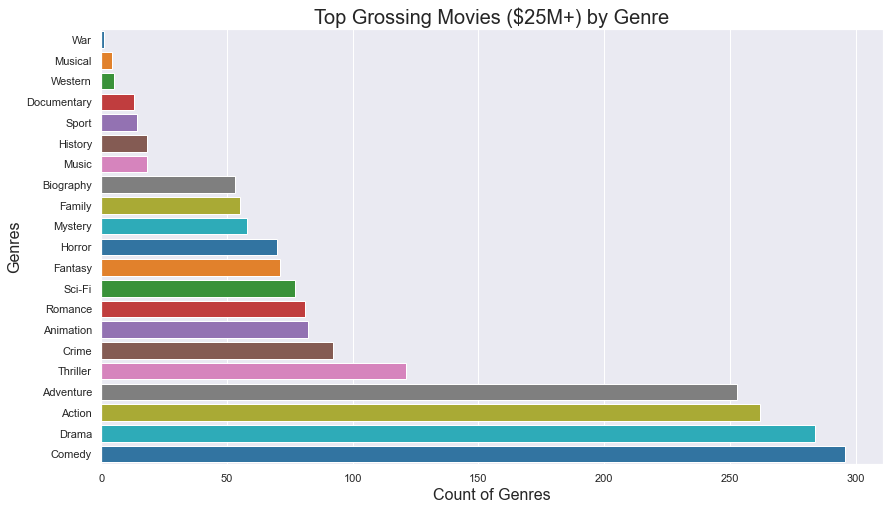

In [38]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(x=values, y=keys, palette='tab10')
ax.set_title('Top Grossing Movies ($25M+) by Genre', fontsize=20)
ax.set_ylabel('Genres', fontsize=16)
ax.set_xlabel('Count of Genres', fontsize=16)

plt.savefig('Images/Top_Gross_Movies_By_Genre.png');

## Recommendation #1
* **Microsoft Studios should aim to produce movies that are in the Comedy, Drama, Action, or Adventure genres.**

## Movie Length vs. Domestic Gross

For the next analysis, we want to see if how long a movie runs for affects the domestic gross at the box office.

In [39]:
# Create a new column for the average review
ratings_gross_copy['Average Review'] = round(ratings_gross_copy['averagerating']) 

In [40]:
# Confirm that it was added to our dataframe
ratings_gross_copy.head() 

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,Average Review
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000.0,2014,4.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000.0,2013,5.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000.0,2011,8.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000.0,2010,6.0
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000.0,2011,7.0


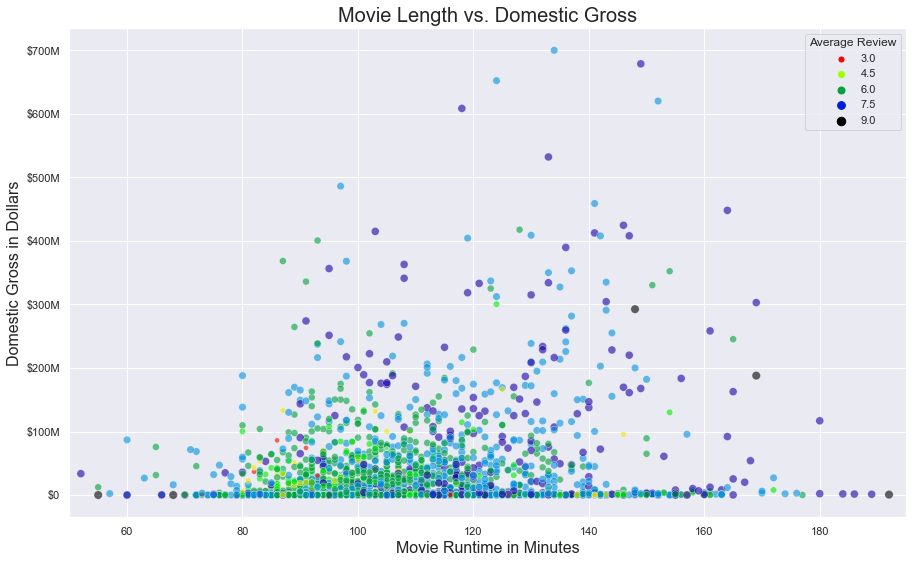

In [41]:
fig, ax = plt.subplots(figsize=(15,9))

# Plot our scatter plot
sns.scatterplot(data=ratings_gross_copy, x='runtime_minutes', y='domestic_gross', hue = 'Average Review', 
                palette='nipy_spectral_r', size='Average Review', alpha=0.6)

# Set title and axises
ax.set_title('Movie Length vs. Domestic Gross', fontsize = 20)
ax.set_xlabel('Movie Runtime in Minutes', fontsize=16)
ax.set_ylabel('Domestic Gross in Dollars', fontsize=16)
ax.set_xlim(50, 195)
yticks = np.linspace(0, 700000000, num=8)
ax.set_yticks(yticks)
ax.set_yticklabels(['$0', '$100M', '$200M', '$300M', '$400M', '$500M', '$600M', '$700M'])

plt.savefig('Images/Movie_Length_v_Dom_Gross.png');

It does appear that the above chart is slighly left-skewing. The movies that fall between 100 and 120 minutes appear to have an uptick in the domestic gross compared to the movies that fall between 80 and 100 minutes of runtime (same with 120 to 140 compared to 100 to 120, and 140 to 160 compared to 120 to 140). This appears to increase up until movies get longer than 160 minutes at which point the domestic gross falls off. However, this data is not concrete enough so let's take a look at this further. 

The below code helps bin the domestic gross values based on the movie runtimes.

In [42]:
# https://www.reddit.com/r/learnpython/comments/73z4e2/pandas_groupby_or_cut_dataframe_to_bins/
# Set my bins that I want to cut my runtime_minutes into
bins = pd.cut(ratings_gross_copy['runtime_minutes'], [0, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190])

In [43]:
# Group my runtime_minutes and see what the domestic_gross count and mean is
avg_gross_min = ratings_gross_copy.groupby(bins)['domestic_gross'].agg(['count', 'mean'])

In [44]:
# Reset the index
avg_gross_min = avg_gross_min.reset_index()

In [45]:
# Check to make sure the info looks correct
avg_gross_min

,runtime_minutes,count,mean
0,"(0, 80]",79,1.831526e+07
1,"(80, 90]",310,1.655507e+07
2,"(90, 100]",603,2.401632e+07
3,"(100, 110]",573,2.611330e+07
4,"(110, 120]",428,3.094591e+07
5,"(120, 130]",246,4.238161e+07
6,"(130, 140]",162,5.776029e+07
7,"(140, 150]",81,8.061147e+07
8,"(150, 160]",46,4.024576e+07
9,"(160, 170]",23,8.046187e+07


Now, we can look to plot the average domestic gross based on 10 minute intervals of runtime.

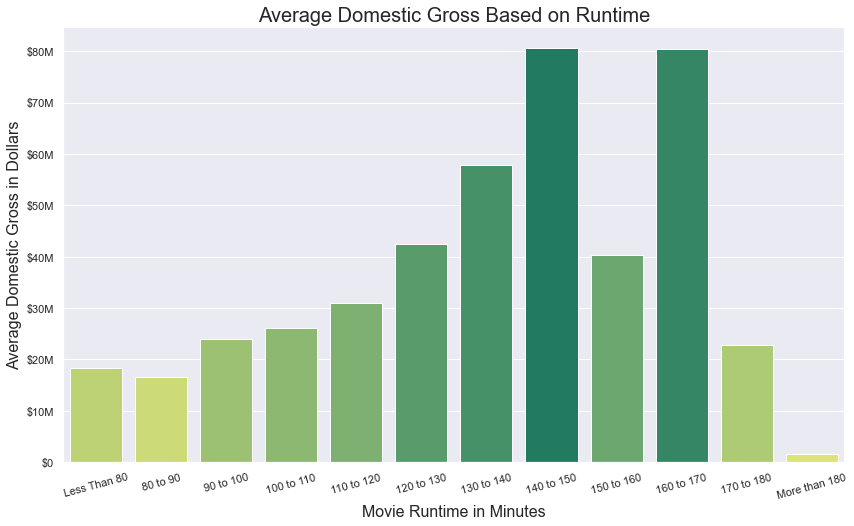

In [46]:
fig, ax = plt.subplots(figsize=(14,8))

# http://stackoverflow.com/a/6266510/1628638
pal = sns.color_palette("summer", len(avg_gross_min))
rank = avg_gross_min['mean'].argsort().argsort()   
       
# https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.barplot(x = avg_gross_min['runtime_minutes'], y = avg_gross_min['mean'], 
            palette=np.array(pal[::-1])[rank])

ax.set_title('Average Domestic Gross Based on Runtime', fontsize = 20)
ax.set_xlabel('Movie Runtime in Minutes', fontsize=16)
ax.set_ylabel('Average Domestic Gross in Dollars', fontsize=16)
yticks = np.linspace(0, 80000000, num=9)
ax.set_yticks(yticks)
ax.set_yticklabels(['$0', '$10M', '$20M', '$30M', '$40M', '$50M', '$60M', '$70M', '$80M'])
xticks = np.linspace(0, 11, num=12)
ax.set_xticks(xticks)
ax.set_xticklabels(['Less Than 80', '80 to 90', '90 to 100', '100 to 110', '110 to 120', '120 to 130', '130 to 140',
                   '140 to 150', '150 to 160', '160 to 170', '170 to 180', 'More than 180'], rotation=15)

plt.savefig('Images/Avg_Dom_Gross_By_Runtime.png');

## Recommendation #2
* **Microsoft Studios should aim to produce movies that are 120 to 170 minutes long.**

## When Should A Movie Be Released?
The final part of our analysis is going to take a look at the average domestic gross for each movie based on what month was released. To do this, we need to bring in another dataset, this time from The Movie Database as that dataset includes the release date.

In [47]:
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [48]:
tmdb.head() # Check to make sure it worked

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [49]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Since we want to see if when a movie is released affects the box office performance, we need to merge our original movie_gross dataframe with tmdb dataframe.

In [50]:
tmdb_gross = pd.merge(tmdb, movie_gross, left_on = 'original_title', right_on = 'title')

In [51]:
tmdb_gross.info() # Check to make sure it worked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266 entries, 0 to 2265
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2266 non-null   int64  
 1   genre_ids          2266 non-null   object 
 2   id                 2266 non-null   int64  
 3   original_language  2266 non-null   object 
 4   original_title     2266 non-null   object 
 5   popularity         2266 non-null   float64
 6   release_date       2266 non-null   object 
 7   title_x            2266 non-null   object 
 8   vote_average       2266 non-null   float64
 9   vote_count         2266 non-null   int64  
 10  title_y            2266 non-null   object 
 11  studio             2266 non-null   object 
 12  domestic_gross     2266 non-null   float64
 13  foreign_gross      1526 non-null   float64
 14  year               2266 non-null   int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 283.2+ KB


In [52]:
tmdb_gross.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title_x,vote_average,vote_count,title_y,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,Par.,312400000.0,311500000.0,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,WB,292600000.0,535700000.0,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,BV,415000000.0,652000000.0,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Despicable Me,Uni.,251500000.0,291600000.0,2010


## Check, inspect, and remove duplicates

In [53]:
tmdb_gross['original_title'].duplicated().value_counts()

False    1934
True      332
Name: original_title, dtype: int64

In [54]:
tmdb_gross[tmdb_gross['original_title'].duplicated(keep=False)].sort_values(by='original_title')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title_x,vote_average,vote_count,title_y,studio,domestic_gross,foreign_gross,year
1777,17553,[18],342737,en,20th Century Women,10.413,2016-12-28,20th Century Women,7.4,504,20th Century Women,A24,5700000.0,NaN,2016
1778,20839,[18],342737,en,20th Century Women,10.413,2016-12-28,20th Century Women,7.4,504,20th Century Women,A24,5700000.0,NaN,2016
1189,17650,[18],283235,en,99 Homes,8.850,2014-10-09,99 Homes,6.8,393,99 Homes,BG,1400000.0,NaN,2015
1188,11235,[18],283235,en,99 Homes,8.850,2014-10-09,99 Homes,6.8,393,99 Homes,BG,1400000.0,NaN,2015
1972,23944,[35],431530,en,A Bad Moms Christmas,16.604,2017-11-01,A Bad Moms Christmas,6.3,1044,A Bad Moms Christmas,STX,72100000.0,58400000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,17998,[18],333596,en,Woodlawn,5.575,2015-10-16,Woodlawn,7.0,79,Woodlawn,PFR,14400000.0,NaN,2015
487,10441,"[9648, 878]",349107,en,Wrecked,0.600,2013-04-19,Wrecked,6.0,1,Wrecked,IFC,8000.0,NaN,2011
486,3019,"[9648, 53]",50838,en,Wrecked,4.685,2011-04-01,Wrecked,5.4,156,Wrecked,IFC,8000.0,NaN,2011
257,2560,"[35, 12, 14]",38319,en,Your Highness,12.254,2011-04-08,Your Highness,5.3,735,Your Highness,Uni.,21600000.0,3300000.0,2011


In [55]:
tmdb_gross = tmdb_gross.drop_duplicates(subset='original_title')
tmdb_gross['original_title'].duplicated().value_counts()

False    1934
Name: original_title, dtype: int64

## Drop unnecessary columns

In [56]:
tmdb_gross.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title_x', 'vote_average', 'vote_count',
       'title_y', 'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [57]:
tmdb_gross = tmdb_gross.drop(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'title_y', 'year', 'studio'], axis = 1)

In [58]:
tmdb_gross # Check that our columns were dropped

,original_title,popularity,release_date,title_x,vote_average,vote_count,domestic_gross,foreign_gross
0,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,217600000.0,277300000.0
1,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,312400000.0,311500000.0
2,Inception,27.920,2010-07-16,Inception,8.3,22186,292600000.0,535700000.0
3,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,415000000.0,652000000.0
4,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,251500000.0,291600000.0
...,...,...,...,...,...,...,...,...
2261,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,73300.0,NaN
2262,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,1300000.0,NaN
2263,Elliot: The Littlest Reindeer,2.903,2018-11-30,Elliot: The Littlest Reindeer,3.4,7,24300.0,NaN
2264,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,491000.0,1700000.0


## Convert release_date to a datetime object

In [59]:
tmdb_gross['release_date'].head() # Datatype is an object

0    2010-03-26
1    2010-05-07
2    2010-07-16
3    2010-06-17
4    2010-07-09
Name: release_date, dtype: object

Preview the results to prevent overwriting data if some error occurs.

In [60]:
pd.to_datetime(tmdb_gross['release_date']) # Datatype is now datetime64 which means it worked

0      2010-03-26
1      2010-05-07
2      2010-07-16
3      2010-06-17
4      2010-07-09
          ...    
2261   2018-07-04
2262   2018-11-02
2263   2018-11-30
2264   2018-02-02
2265   2018-02-09
Name: release_date, Length: 1934, dtype: datetime64[ns]

In [61]:
tmdb_gross['release_date'] = pd.to_datetime(tmdb_gross['release_date'])

In [62]:
tmdb_gross['release_date'].head() # Confirm our changes occured

0   2010-03-26
1   2010-05-07
2   2010-07-16
3   2010-06-17
4   2010-07-09
Name: release_date, dtype: datetime64[ns]

We want to see what months are the best to release a movie. We will need to go ahead and break out the specific month from our new datetime object.

In [63]:
pd.to_datetime(tmdb_gross['release_date']).dt.month # Preview results

0        3
1        5
2        7
3        6
4        7
        ..
2261     7
2262    11
2263    11
2264     2
2265     2
Name: release_date, Length: 1934, dtype: int64

In [64]:
tmdb_gross['Release Month'] = pd.to_datetime(tmdb_gross['release_date']).dt.month

In [65]:
tmdb_gross.head() # Confirm our new column was added

,original_title,popularity,release_date,title_x,vote_average,vote_count,domestic_gross,foreign_gross,Release Month
0,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,217600000.0,277300000.0,3
1,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,312400000.0,311500000.0,5
2,Inception,27.920,2010-07-16,Inception,8.3,22186,292600000.0,535700000.0,7
3,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,415000000.0,652000000.0,6
4,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,251500000.0,291600000.0,7


Now we need to aggregate the average domestic_gross by month. We can't sum all of the domestic_gross amounts because we do not know if the same amount of movies were released each month.

In [66]:
tmdb_gross.groupby('Release Month').mean()

,popularity,vote_average,vote_count,domestic_gross,foreign_gross
Release Month,,,,,
1,9.130415,6.042222,788.674074,2.958451e+07,5.109024e+07
2,10.834101,6.113761,1487.761468,4.136267e+07,6.970659e+07
3,10.145943,6.340127,1456.152866,3.581962e+07,7.177550e+07
4,9.314301,6.387730,1015.926380,2.806182e+07,4.330451e+07
5,11.557396,6.386577,2123.550336,5.766597e+07,1.564771e+08
6,11.128884,6.369677,1883.380645,6.433837e+07,1.474472e+08
7,11.709232,6.404878,2063.878049,5.549196e+07,1.322139e+08
8,10.661789,6.325301,1220.331325,3.146082e+07,5.551759e+07
9,9.565089,6.340104,1069.994792,2.661364e+07,5.590010e+07


In [67]:
grouped_tmdb_gross = tmdb_gross.groupby('Release Month').mean() # Create a new dataframe with these results

In [68]:
monthly_avg = grouped_tmdb_gross['domestic_gross']

In [69]:
monthly_avg

Release Month
1     2.958451e+07
2     4.136267e+07
3     3.581962e+07
4     2.806182e+07
5     5.766597e+07
6     6.433837e+07
7     5.549196e+07
8     3.146082e+07
9     2.661364e+07
10    2.095450e+07
11    5.160823e+07
12    6.405913e+07
Name: domestic_gross, dtype: float64

Plot our results on a bar graph.

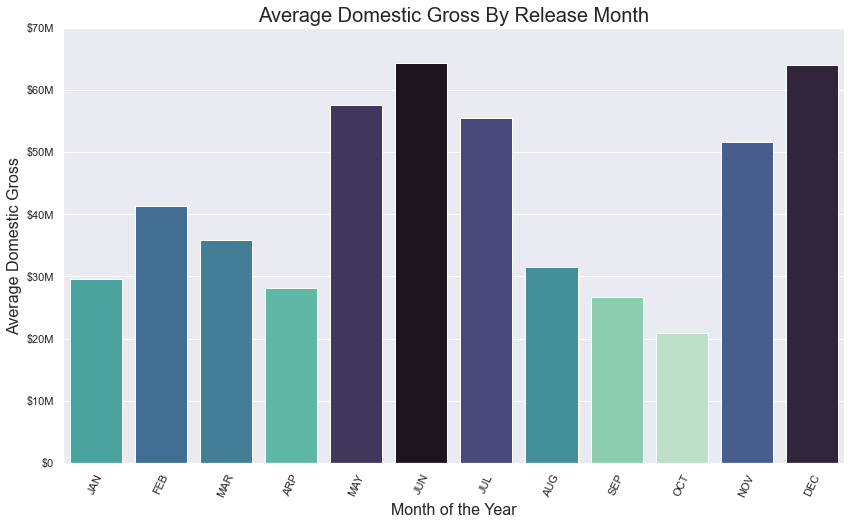

In [70]:
fig, ax = plt.subplots(figsize=(14,8))

pal = sns.color_palette("mako", len(monthly_avg))
rank = monthly_avg.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638

# https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.barplot(x= monthly_avg.index, y = monthly_avg, palette=np.array(pal[::-1])[rank]) 

ax.set_title('Average Domestic Gross By Release Month', fontsize=20)
ax.set_xlabel('Month of the Year', fontsize=16)
ax.set_ylabel('Average Domestic Gross', fontsize=16)
xticks = np.linspace(start=0, stop=11, num=12)
ax.set_xticks(xticks)
ax.set_xticklabels(['JAN', 'FEB', 'MAR', 'ARP', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'], rotation=65)
yticks = np.linspace(start=0, stop=70000000, num=8)
ax.set_yticks(yticks)
ax.set_yticklabels(['$0', '$10M', '$20M', '$30M', '$40M', '$50M', '$60M', '$70M'])

plt.savefig('Images/Avg_Dom_Gross_By_Month.png');

## Recommendation #3
* **Microsoft Studios should aim to release movies in May, June, July or December.**

In [71]:
conn.close;

## Conclusions
This analysis leads to three recommendations for Microsoft Studios as they enter into the world of producing their own movies:
* Microsoft Studios should produce movies that are in the Comedy, Drama, Action, or Adventure genres.
* Microsoft Studios should aim to produce movies that are 120 to 170 minutes long.
* Microsoft Studios should release movies in May, June, July or December.


## Next Steps
Further analysis could yield additional insights to help guide Microsoft as it starts its new movie studio:
* Look at production budgets for each film and see what type of genre has the best return on investment based on the movie gross.
* Look at the marketing budgets for each film and see what type of advertising each film did. Options could include out of home, linear TV advertising, digital advertising, custom content, etc.
* The movie distribution landscape is rapidly changing as films are no longer going to theaters and then to home entertainment 90 days later. Although there would be limited data available, we could attempt to see what type of distribution model grosses the most amount of dollars (box office performance + home entertainment sales).
* We could also look to analyze the number of movies that were released on the same weekend and see how that affects box office performance as well as long term movie performance.